In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
benchmark_results = {}
for n_variables in [3,5,10,20,50]:
        benchmark_results[n_variables] = {}
        for noise_std in [0.01, 0.1, 0.3]:
            
            output_folder = f'../data_N{n_variables}_std{noise_std}/'
            file_name = 'test_run_scores.csv'

            #if file exists
            if os.path.isfile(output_folder + file_name):
                df = pd.read_csv(output_folder + file_name)
                benchmark_results[n_variables][noise_std] = df
            else:
                print(f'File {output_folder + file_name} does not exist')
                benchmark_results[n_variables][noise_std] = None


File ../data_N50_std0.01/test_run_scores.csv does not exist
File ../data_N50_std0.1/test_run_scores.csv does not exist
File ../data_N50_std0.3/test_run_scores.csv does not exist


In [4]:
#aggregate everything into a single csv
df = pd.DataFrame()
for n_variables in benchmark_results:
    for noise_std in benchmark_results[n_variables]:
        if benchmark_results[n_variables][noise_std] is not None:
            df = df.append(benchmark_results[n_variables][noise_std])

df.to_csv('benchmark_results_aggregated.csv', index=False)

/tmp/ipykernel_15259/4103238542.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(benchmark_results[n_variables][noise_std])
/tmp/ipykernel_15259/4103238542.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(benchmark_results[n_variables][noise_std])
/tmp/ipykernel_15259/4103238542.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(benchmark_results[n_variables][noise_std])
/tmp/ipykernel_15259/4103238542.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(benchmark_results[n_variables][noise_std])
/tmp/ipykernel_15259/4103238542.py:6: FutureWarning: The frame.append method

In [10]:
import pickle 
with open('benchmark_results.pkl', 'wb') as f:
    pickle.dump(benchmark_results, f)

   Model Metric     Score
3    D2C     f1       NaN
9    D2C     f1  0.400000
15   D2C     f1  0.222222
21   D2C     f1  0.181818
27   D2C     f1  0.363636
   Model Metric     Score
3    D2C     f1  0.545455
9    D2C     f1  0.363636
15   D2C     f1  0.333333
21   D2C     f1  0.571429
27   D2C     f1  0.363636
   Model Metric     Score
3    D2C     f1  0.111111
9    D2C     f1  0.363636
15   D2C     f1  0.545455
21   D2C     f1  0.285714
27   D2C     f1  0.133333
   Model Metric     Score
3    D2C     f1  0.457143
9    D2C     f1  0.437500
15   D2C     f1  0.357143
21   D2C     f1  0.608696
27   D2C     f1  0.363636
   Model Metric     Score
3    D2C     f1  0.413793
9    D2C     f1  0.500000
15   D2C     f1  0.500000
21   D2C     f1  0.307692
27   D2C     f1  0.153846
   Model Metric     Score
3    D2C     f1  0.615385
9    D2C     f1  0.200000
15   D2C     f1  0.200000
21   D2C     f1  0.666667
27   D2C     f1  0.500000
   Model Metric     Score
3    D2C     f1  0.400000
9    D2C    

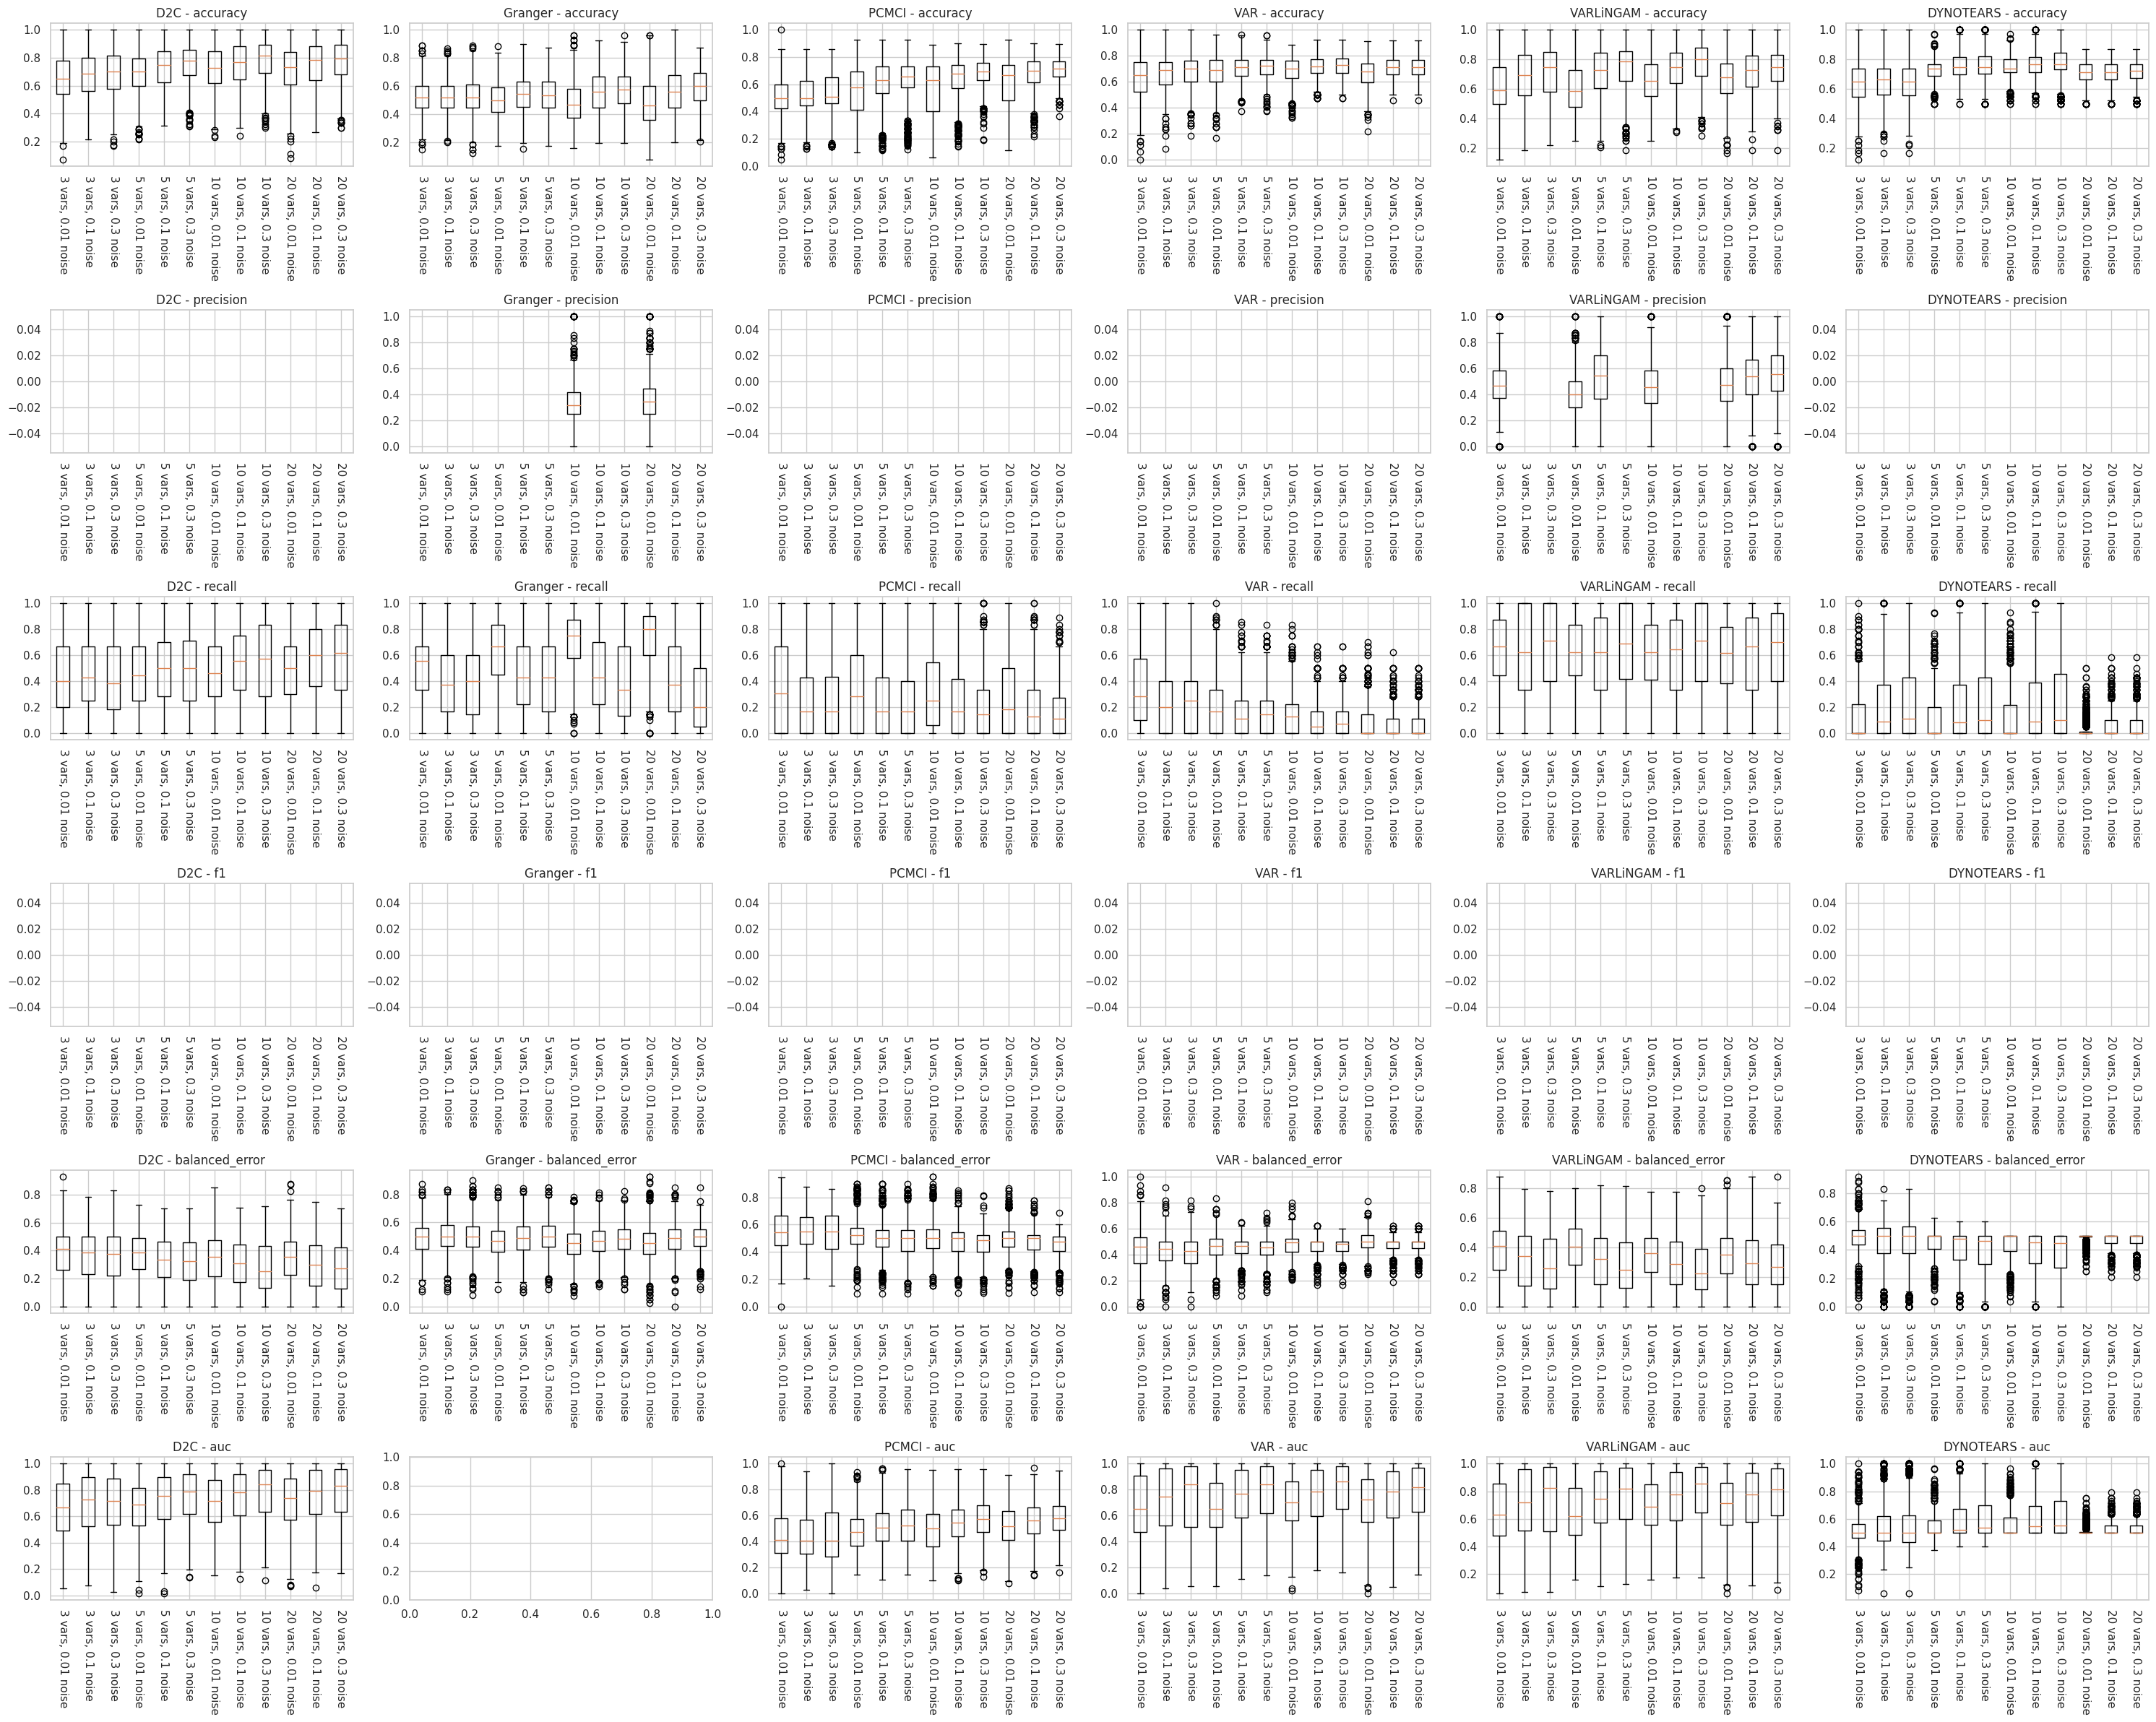

In [17]:
# Function to plot metrics evolution for each model and metric
def plot_metrics_evolution(simulated_data, n_variables_options, noise_std_options, models, metrics):
    # Setting up the plot
    sns.set(style="whitegrid")
    num_rows = len(metrics)
    num_cols = len(models)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 4*num_rows))
    
    for i, metric in enumerate(metrics):
        for j, model in enumerate(models):
            ax = axes[i][j] if num_rows > 1 else axes[j]
            data_to_plot = []
            labels = []
            
            for n_variables in n_variables_options:
                for noise_std in noise_std_options:
                    df = simulated_data[n_variables][noise_std]
                    df.dropna(inplace=True)
                    df_filtered = df[(df['Model'] == model) & (df['Metric'] == metric)]
                    if metric == 'f1':
                        print(df_filtered.head())
                    score = df_filtered['Score'].values
                    if len(score) > 0:  # Ensure there is data to plot
                        data_to_plot.append(score)
                        labels.append(f'{n_variables} vars, {noise_std} noise')
            
            # If there's data to plot, create a boxplot
            if data_to_plot:
                ax.boxplot(data_to_plot, labels=labels)
                ax.set_title(f'{model} - {metric}')
                ax.tick_params(axis='x', rotation=-90)
            
    plt.tight_layout()
    plt.show()

# Plotting the metrics evolution
plot_metrics_evolution(benchmark_results,[3,5,10,20] , [0.01, 0.1, 0.3], benchmark_results[3][0.01].Model.unique(), benchmark_results[3][0.01].Metric.unique())


In [7]:
for n_variables in [3,5,10,20,50]:
        for noise_std in [0.01, 0.1, 0.3]:
                if benchmark_results[n_variables][noise_std] is not None:
                    same_model_df = pd.DataFrame()
                    for model in df.Model.unique():
                        df_model = df[df.Model == model]
                        df_model = df_model.reset_index(drop=True)
                        df_model = df_model.drop(columns=['Model'])

                    

  Model          Metric  Score
0   D2C        accuracy   0.65
1   D2C       precision    NaN
2   D2C          recall   0.00
3   D2C              f1    NaN
4   D2C  balanced_error   0.50
  Model          Metric     Score
0   D2C        accuracy  0.321429
1   D2C       precision  0.296296
2   D2C          recall  1.000000
3   D2C              f1  0.457143
4   D2C  balanced_error  0.475000
  Model          Metric     Score
0   D2C        accuracy  0.666667
1   D2C       precision  0.375000
2   D2C          recall  0.428571
3   D2C              f1  0.400000
4   D2C  balanced_error  0.410714
  Model          Metric     Score
0   D2C        accuracy  0.666667
1   D2C       precision  0.500000
2   D2C          recall  0.100000
3   D2C              f1  0.166667
4   D2C  balanced_error  0.475000


KeyError: 0.01